# Rhythmicity of Neural Data

Looking into how different signals are represented in fourier decompositions.

Goal: thinking about if and when one should infer rhythmic properties of time series. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from neurodsp import spectral, sim

from neurodsp.utils import create_times
from neurodsp.plts import plot_time_series, plot_power_spectra

In [2]:
# Settings
n_seconds = 2
s_rate = 500

n_points = s_rate*n_seconds
times = create_times(n_points/s_rate, s_rate)

## 1) Sinuisoidal Representations of Non-Rhythmic Signals

First, we let's explore how different types of signals are represented in frequency space. 

### 1.1 The Dirac Delta

In [3]:
# Simulate a delta function
dirac_sig = np.zeros([n_points])
dirac_sig[500] = 1

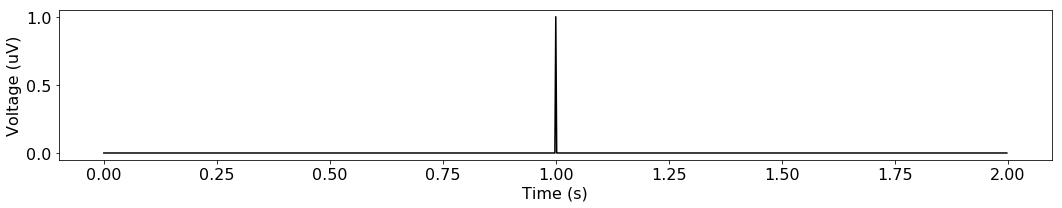

In [4]:
plot_time_series(times, dirac_sig)

In [5]:
fs, ps = spectral.compute_spectrum(dirac_sig, 100)

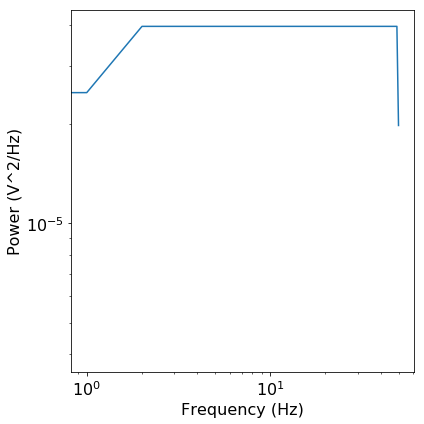

In [6]:
plot_power_spectra(fs, ps)

### Section Conclusions

The power spectrum of the Dirac delta function has power across all frequencies, despite containing a single non-zero value, and thus having no rhythmic properties to it in the time domain. 

The Dirac delta example is offered as a proof of principle that observing power in a frequency does not necessarily imply that one should consider power at a particular frequency in a frequency representation to imply any level of actual rhythmic activity in the time series.

### 1.2 Coloured Noise Signals

Let's now look at 'noise' signals.

For example, 'white noise', is, in the time series, a signal generated with uncorrelated samples, typically with a mean of zero, and some finite variance. Since each element of the signal is sampled randomly, there is no consistent rhythmic structure in the signal. In the frequency representation, white noise has a flat power spectrum, with equal power across all frequencies. 

Other 'colors' of noise refer to different patterns across frequencies in the power spectrum. For example, pink noise is a signal with a trend whereby the amount of power decreases systematically with increasing power. 

In the signals below, we simulate coloured noise signals with, by definition, no rhythmic properties. In the power spectrum, these signals exhibit power at all frequencies, with the relationship of powers across frequencies dependent on the 'colour' of the noise. 

#### 1.2.1 White Noise

In [7]:
white_sig = np.random.normal(0, 1, n_points)

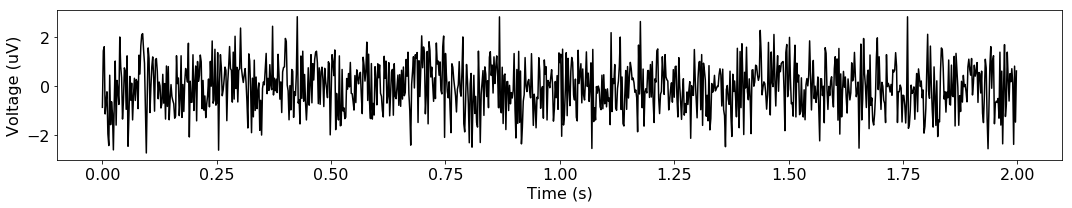

In [8]:
plot_time_series(times, white_sig)

In [9]:
fs, ps = spectral.compute_spectrum(white_sig, s_rate)

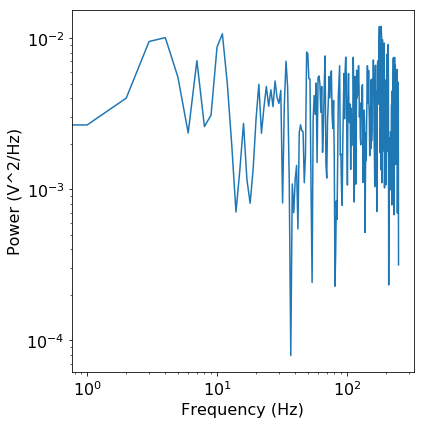

In [10]:
plot_power_spectra(fs, ps)

#### 1.2.2 Pink Noise

In [11]:
pink_sig = sim.sim_powerlaw(n_seconds, s_rate, exponent=-1)

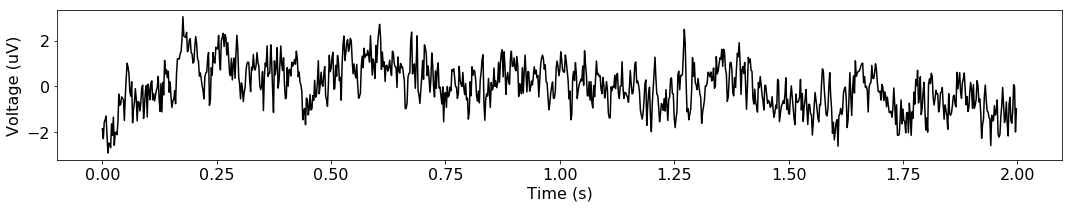

In [12]:
plot_time_series(times, pink_sig)

In [13]:
fs, ps = spectral.compute_spectrum(pink_sig, s_rate)

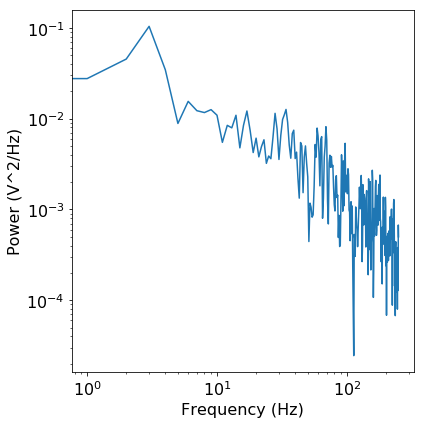

In [14]:
plot_power_spectra(fs, ps)

#### Section Conclusion

The 'coloured noise' signals above are simulated with no rhythmic properties. 

Nevertheless, and by definition, in the power spectra of such signals, there is power across all frequencies, with some pattern across frequencies. 

However, there are no frequencies at which power is different from expected from an aperiodic noise signal. 

### Part 1: Conclusion

The power spectrum of a dirac delta function is used to show the simplest case in which power at a particularly frequency does not imply any rhythmic component at that frequency in the time series.

Similarly, more complex 'coloured noise' signals, can be generated, which lack rhythmic properties, but which display power across all frequencies. Here again, power in a particular frequency does not imply rhythmic power at that frequency. 

## Part 2: Complex Signals with Multiple Oscillators

In principle, signals that display power across all frequencies need not arise from, or be best descriped as, signals with rhythmic components.

Of course, it could be the case that such a signal does indeed arise from the summation across many oscillations. Here we will explore that. 

Editorial Note:
- Point here is to show the 'tiny oscillator' model. Sure, it's possible. 
- But also hopefully motivates that it's a bit a weird concept, and so later we can argue on the most likely model. 

In [15]:
tiny_oscs = {'sim_oscillation' : [{'freq' : freq} for freq in np.arange(0.1, 250, 0.1)]}

In [16]:
print('This signal definition has {} oscillations in it. Wow!'.format(len(tiny_oscs['sim_oscillation'])))
print('That seems like too many though. I bet brains don\'t do this...')

This signal definition has 2499 oscillations in it. Wow!
That seems like too many though. I bet brains don't do this...


### 2.1 Balanced Tiny Oscillators

In [17]:
tosc_sig = sim.sim_combined(n_seconds, s_rate, tiny_oscs)

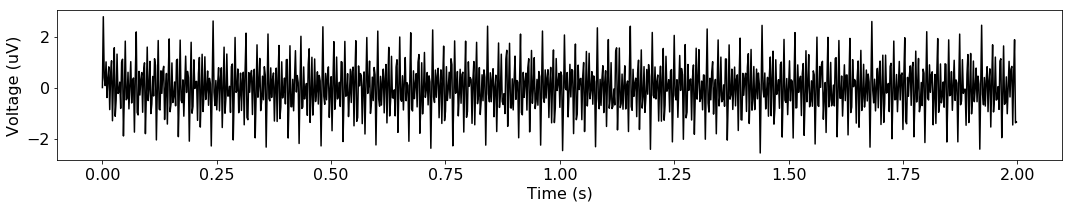

In [18]:
plot_time_series(times, tosc_sig)

In [19]:
fs, ps = spectral.compute_spectrum(tosc_sig, s_rate)

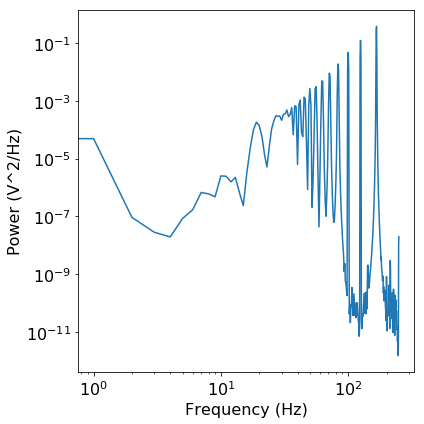

In [20]:
plot_power_spectra(fs, ps)

#### Section Conclusion

A signal with a power spectrum that looks like white noise *can* be simulated with a sum of many oscillations. 

Editorial Notes:
- So, the power spectra looks pretty much like white noise, with something quirky near the end?
- Right now, every simulated oscillation has the same phase, which is not ideal. Might explain the quirks in the power spectrum. 
    - We (lol, me) need to update the simulations to take in a phase offset and simulate random phases here. 

### 2.2 Unbalanced Tiny Oscillators

Now let's explore multiple oscillator models with 1/f power spectra. 

Editorial Note: 
- well shit. The proportions input is broken for when an embedded list of parameters to the same sim function is passed in. lol ooops. 
- This was supposed to be 1/f power spectra, simulated as 'tiny oscillators'. Should be totally doable, once I fix the sims. 

In [21]:
# Set up proportions
#proportions = list(np.linspace(0.0, 1.0, num=len(tiny_oscs['sim_oscillation'])))
#proportions.reverse()

In [22]:
#utosc_sig = sim.sim_combined(n_seconds, s_rate, tiny_oscs, variances=proportions)

In [23]:
#plot_time_series(times, utosc_sig)

In [24]:
#fs, ps = spectral.compute_spectrum(utosc_sig, s_rate)

In [25]:
#plot_power_spectra(fs, ps)

#### Section Conclusion

A signal comprised of multiple simulated oscillations, with coordinated power, can also approximate power spectra that mimic coloured noise. 

However, note that this model poses a lot of coordinated entities. 

This simulation has _n_frequencies_ oscillators, with a coordinated pattern of relative power across all frequencies. 

## Part 3: Neural Signals

So, since power spectra might or might not be described and interpreted as containing rhythmic components, the question becomes what is the best / most likely description for neural signals. 

Neural signals clearly containt 1/f activity, as seen in their frequency representations. 

They also sometimes do contain clear rhythmic components, visible as clear and relatively consistent rhythms in the time series, and regions of extra power, or peaks, in the power spectra, over and above 1/f. 

Here we will try and infer what is the most likely description for neural activity, across frequencies other than where we see clear peaks. To do so, we will explore a simple model of local field potential data generation, which shows that 1/f activity can arise from aggregated activity across post-synaptic potentials. 

### 3.1: Synaptic Kernels

Editorial Note:
- Maybe like mention and show synaptic kernels here? Like, try to motivate the model. Not sure if needed. 

In [26]:
#kernel = sim.sim_synaptic_kernel(0.2, s_rate, 0.01, 0.01)

In [27]:
#plt.plot(kernel)

### 3.2: Local Field Potentials

Simulate a local field potential as aggregrate activity of PSPs. 

In [28]:
synap_sig = sim.sim_synaptic_current(n_seconds, s_rate)

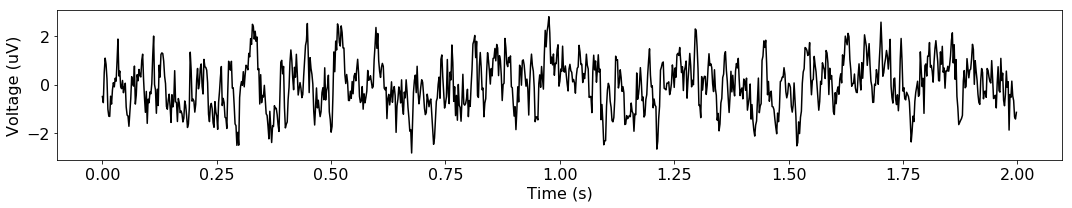

In [29]:
plot_time_series(times, synap_sig)

In [30]:
fs, ps = spectral.compute_spectrum(pink_sig, s_rate)

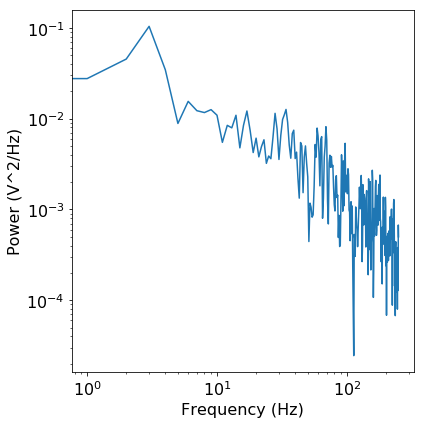

In [31]:
plot_power_spectra(fs, ps)

#### Section Conclusion

A simple LFP model creates 1/f distributed data based on simulating aggregated activity from PSPs. Under this model, the power spectra is 1/f distributed, with no characteristic frequencies, and the time series exhibits aperiodic activity. Under this model the power at any particular frequency is not considered to relate to rhythmic activity. 

## Conclusion

Every time series *can* be perfectly represented by a sum of sine waves.

That does not, however, imply that that power at a particular frequency in a power spectrum implies any rhythmic property. (Part 1)

Real neural signals exhibit 1/f like properties in power spectra. This could, in theory, arise from a generative process in which some large number of distinct oscillations contribute power, with some kind of coordinated relative power across frequencies. (Part 2) 

However, a simple LFP model offers a much simpler explanation in which the 1/f activity is expected under a model in which LFP data is driven primarily by PSPs, and in this model, the power spectrum is not considered to reflect rhythmic properties. (Part 3)

So, while there may be, and *sometimes* are rhythmic properties in neural time series, the observation that there is power in a particular frequency is not sufficient to argue for the presence of an oscillation. The 1/f nature of neural time series is most likely to reflect aperiodic activity, and a claim that a particular frequency reflects, even partially, rhythmic activity requires extra validation that there is evidence for rhythmic activity at this frequency. 

Editorial Note:
- Might want to note something about dynamics, for example:
    - Similarly, observing a change in the amount of power at a particular frequency also does not imply a change in rhythmic activity, if rhythmic activity was never verified, as shifts in the 1/f could look like shifts in narrow-band frequency regions. 